# Advanced Certification Program in Computational Data Science
## A Program by IISc and TalentSprint
### Additional Notebook (ungraded) on SHAP Values


## Learning Objectives

At the end of the experiment, you will be able to

* Understand the concept of Shapley values.
* Implement SHAP for regression models and classification models
* Understand the insights derived from the SHAP implementation

In [1]:
# @title Walkthrough Video
from IPython.display import HTML

HTML("""<video width="420" height="240" controls>
<source src="https://cdn.exec.talentsprint.com/content/04_Aug_2022SHAP.mp4">
</video>""")


### Introduction

  * Machine learning models are usually thought of as a “black box.” A model takes some features as input and produces some predictions as output. The common questions after model training are:
    - How do different features affect the prediction results?
    - What are the top features that influence the prediction results?
    - Are the model performance metrics giving the full picture?

* Model explainability therefore plays an important role in machine learning, as the insights are useful in:
    - Debugging
    - Informing feature engineering
    - Directing future data collection
    - Informing human decision-making
    - Building trust

* To better understand or explain what is happening inside a machine learning model, we will use an open-source library called **SHAP.**

### SHAP

The SHAP (SHapley Additive exPlanations) framework is an important advancement in the field of machine learning model interpretation. It was developed by Scott Lundberg and Su-In Lee, and combines several existing methods to create an intuitive, theoretically-sound approach to explain predictions for any model.

  * SHAP builds model explanations by asking the same question for every prediction and feature: “How does prediction $i$ change when feature $j$ is removed from the model?” So-called SHAP values are the answers. They quantify the magnitude and direction (positive or negative) of a feature’s effect on a prediction.

  * The Python software package [`shap`](https://github.com/slundberg/shap), developed by Scott Lundberg et al., provides utilities to calculate and plot SHAP values. The project’s main page demonstrates typical SHAP plots and provides links to example notebooks.

For example, in the figure below, the features "Age=65", "BP=180" and "BMI=40" are contributing positively to give the output as 0.4 or they are moving it away from base value (the average of the prediction by the model), which is 0.1 in this case, because the shapley values of these features is positive.


![model interpretation](https://cdn.iisc.talentsprint.com/CDS/Images/Shap_model.png)

In the same sense, feature "SEX=F" is contributing negatively to give the output 0.4 or it is decreasing the output which is evident from its negative shapley value. In turn it makes the output move towards the base value

Hence SHAP helps to explain what was the contribution of each feature value in giving a particular output by the model.

To know more details about SHAP refer [here](https://christophm.github.io/interpretable-ml-book/shap.html)

To understand the Math behind SHAP refer [here](https://cdn.extras.talentsprint.com/CDS/MiniProjects/SHAP%20Math%20explained.pdf)

### Installing SHAP

In [2]:
#!pip install shap


This notebook is divided into two sections:
* Regression
* Classification

Implementation of SHAP has been discussed in detail both for regression and classification using different models and visualization techniques.

# **Regression**

To proceed to the official documentation of SHAP for Regression models, click [here](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html)

### Regression on Diabetes dataset with Scikit-learn

### Load data

In [3]:
import warnings
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time

X, y = shap.datasets.diabetes()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 10)


def print_accuracy(f):
    print(
        "Root mean squared test error = {0}".format(
            np.sqrt(np.mean((f(X_test) - y_test) ** 2))
        )
    )
    time.sleep(0.5)  # to let the print get out before any progress bars


# ignore warnings
warnings.filterwarnings("ignore")
shap.initjs()


(353, 10)
(89, 10)


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m2/mini-project-2/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Linear regression

In [4]:
from sklearn import linear_model

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

print_accuracy(lin_regr.predict)


Root mean squared test error = 58.517171277315626


### Explain a single prediction from the test set

In [5]:
shap.initjs()
ex = shap.KernelExplainer(lin_regr.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0, :])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0, :])


Each feature value is a force that either increases or decreases the prediction. The prediction starts from the baseline. The baseline for shapley values is the average of all predictions. In the plot, each Shapley value is an arrow that pushes to increase (positive value) or decrease (negative value) the prediction. These forces balance each other out at the actual prediction of the data instance.

In blue, we have negative shapley values, it will decrease the value of prediction for this instance. While the shapley value in red represents everything that will increase the value of prediction for this instance.

Here the base value is 151, feature value "bmi" and "bp" making f(x)(prediction value = 238.47) move away from the base line which in turn makes its value to rise. The features values "sex" and "s2" are making it move in a negative direction or decreasing its value.

100%|██████████| 89/89 [00:01<00:00, 56.59it/s]


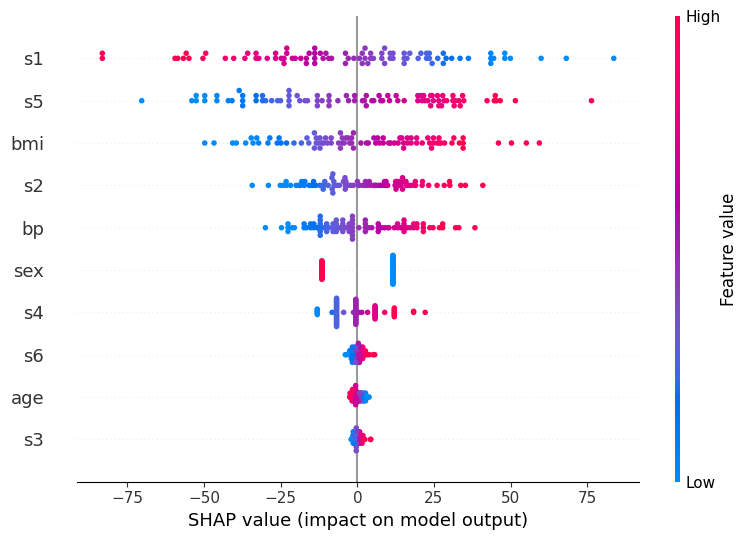

In [6]:
shap.initjs()
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


This is a summary plot which combines feature importance with feature effects. Each point on the summary plot is a shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the shapley value. The color represents the value of the feature from low to high. This is a global interpretation of the effect of each value of every feature upon the respective predictions.


The shapley values are plotted on the x axis. The features are plotted on the y axis towards the left side. And for every feature value its tendency is plotted with dots.

For eg:-
s4 has more values towards right side of the graph, this will make the predictions move in the positive directions or the value of predictions will increase because of the values of feature s4.

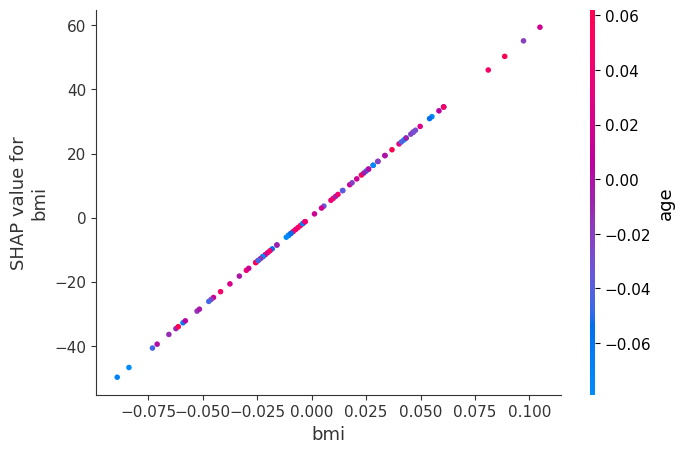

In [7]:
shap.dependence_plot("bmi", shap_values, X_test)


Above plot demonstrates the behaviour of all the values of a single feature upon the output of the model.
To understand the effect, a single feature has on the model output, we can plot a SHAP value of that feature vs. the value of the feature for all instances in the dataset. Vertical dispersions at a single value show the effect of interaction with other features which are absent for this particular plot. It means that the interaction between "bmi" and other features is absent.

Each dot represents a row of the data. The horizontal location is the actual value of that datapoint. The vertical location is demonstrating the effect of that feature value over the output of the model.

The upward moving slope of bmi suggests that bmi has a direct and positive effect upon the target/output. The feature plotted towards the right is the one with which bmi has interacted the most.


In [8]:
shap.initjs()
shap.force_plot(ex.expected_value, shap_values, X_test)


Clustering Shapley Values:
You can cluster your data with the help of Shapley values. The goal of clustering is to find groups of similar instances.
SHAP clustering works by clustering the Shapley values of each instance. This means that you cluster instances by explanation similarity.
The plot consists of many force plots, each of which explains the prediction of an instance. We rotate the force plots vertically and place them side by side according to their clustering similarity.


The above plot describes the behaviour of output with respect to different features. The feature with which the user wants to see the interaction of the predicted variable can be set from the drop down menu given just above the plot.

The color coding behaviour of the plot is same, red describing the ratio of the feature instances making the prediction rise and vise versa for blue.

If cursor is scrolled over the plot, the instance values for different features will pop up, giving more insight about the datapoints for that particular prediction.

### Decision tree regressor

Root mean squared test error = 71.23061914642545


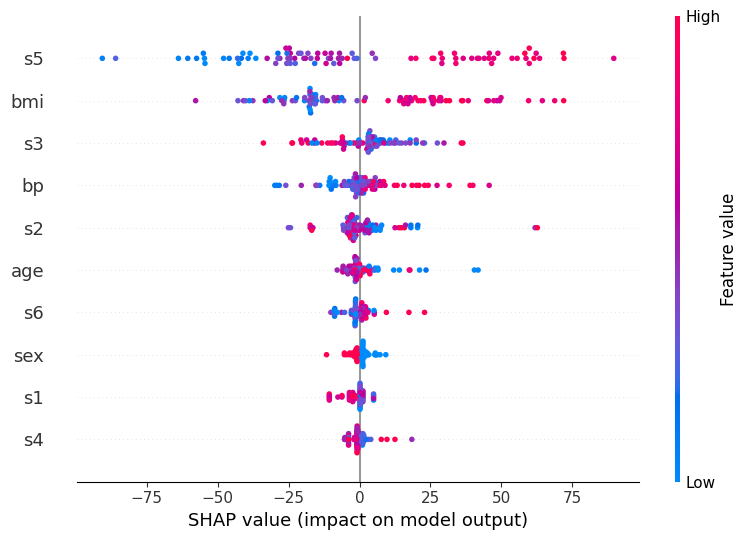

In [9]:
from sklearn import tree

dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(X_train, y_train)
print_accuracy(dtree.predict)

# explain all the predictions in the test set
ex = shap.TreeExplainer(dtree)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


On grounds of similar interpretation as above, it can be seen from the above plot that majority datapoints of the feature bmi are contributing positively in prediction and so on.

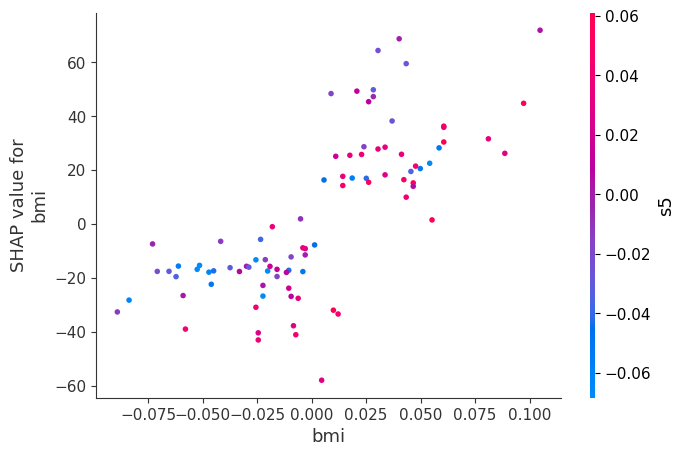

In [10]:
shap.dependence_plot("bmi", shap_values, X_test)


In contrary to above plots, this plot has a vertical spread that suggests the interaction of bmi with other features when it comes to it's effect upon feature s5.

In [11]:
shap.initjs()
shap.force_plot(ex.expected_value, shap_values, X_test)


### Random forest

Root mean squared test error = 61.16592960743402


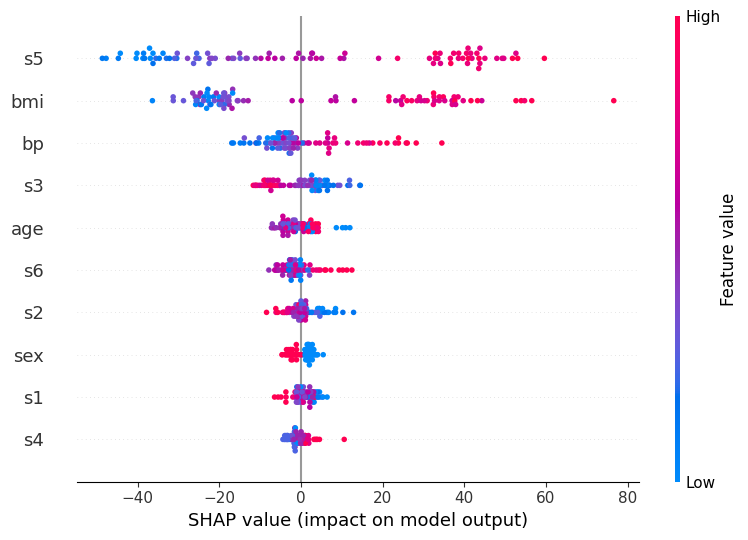

In [12]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(
    n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0
)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

# explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In the above plot it is clearly visible that majority datapoints of bmi have a positive effect on prediction.

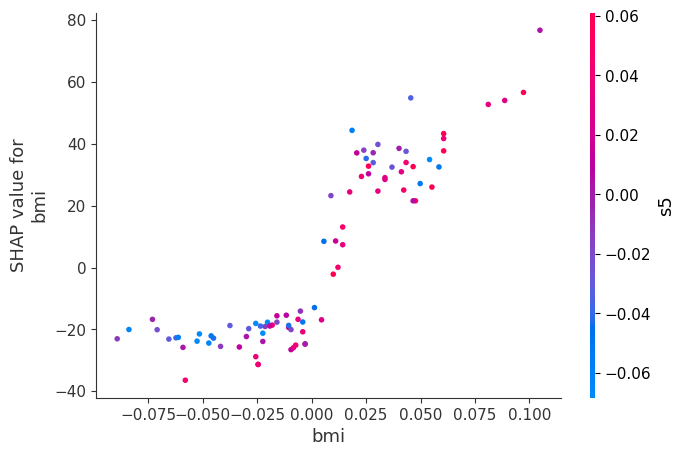

In [13]:
shap.dependence_plot("bmi", shap_values, X_test)


In the above plot it can be seen that there is non-uniform contribution of bmi in making an output. Moreover for the same value of bmi, for eg, between 0.000 and 0.025, there are many datapoints that have a vertical spread suggesting the effect of other features in making those predictions.

In [14]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)


### Neural network

Root mean squared test error = 58.21606764199288


100%|██████████| 89/89 [00:01<00:00, 55.28it/s]


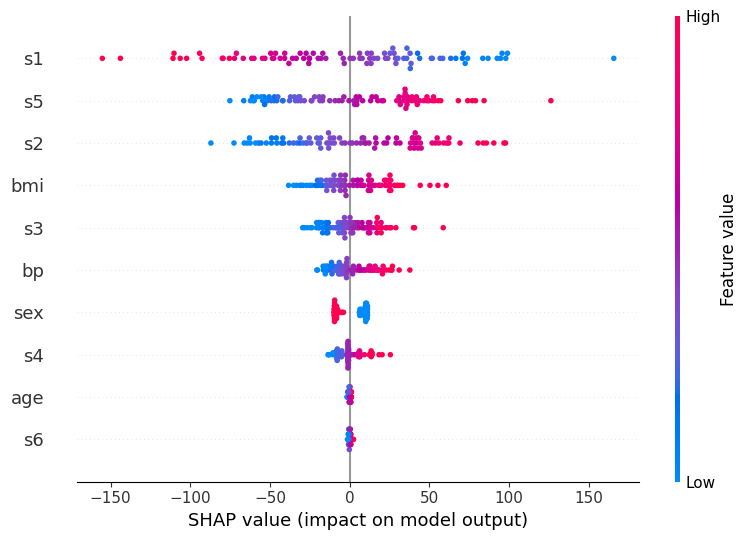

In [15]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(solver="lbfgs", alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
nn.fit(X_train, y_train)
print_accuracy(nn.predict)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(nn.predict, X_train_summary)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

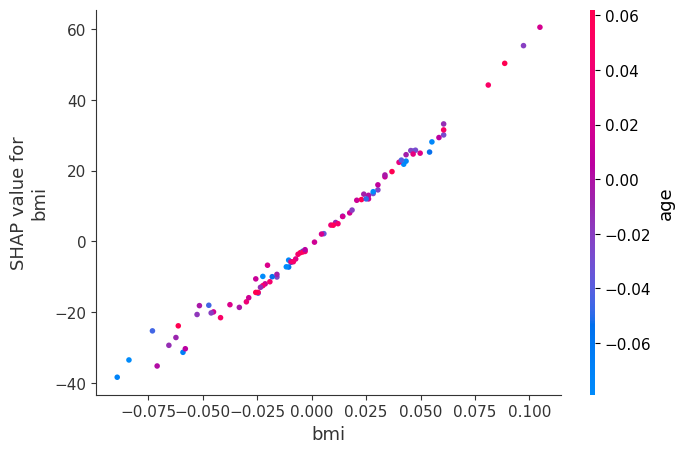

In [16]:
shap.dependence_plot("bmi", shap_values, X_test)


In [17]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)


# **Classification**

To proceed to the official documentation of SHAP upon classification click [here](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Census%20income%20classification%20with%20scikit-learn.html)

### Census income classification with scikit-learn


In [76]:
import sklearn
import shap


### Load the census data

In [77]:
X, y = shap.datasets.adult()


In [78]:
X


,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


In [79]:
# I was facing issue with "occupation" column scaling; so I need to figure out what's going on with the data type
print(X.describe())
print("\n")
print(X.info())


                Age     Workclass  Education-Num  Marital Status  \
count  32561.000000  32561.000000   32561.000000    32561.000000   
mean      38.581646      3.868892      10.080679        2.611836   
std       13.640432      1.455960       2.572720        1.506222   
min       17.000000      0.000000       1.000000        0.000000   
25%       28.000000      4.000000       9.000000        2.000000   
50%       37.000000      4.000000      10.000000        2.000000   
75%       48.000000      4.000000      12.000000        4.000000   
max       90.000000      8.000000      16.000000        6.000000   

         Occupation  Relationship          Race           Sex  Capital Gain  \
count  32561.000000  32561.000000  32561.000000  32561.000000  32561.000000   
mean       6.572740      2.494518      3.665858      0.669205   1077.648804   
std        4.228857      1.758232      0.848806      0.470506   7385.291992   
min        0.000000      0.000000      0.000000      0.000000      0.00

In [80]:
# I have changed the data type of "Occupation" column from int8 to int64 to fix the error
X["Occupation"] = X["Occupation"].astype("int64")
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32561 non-null  float32
 1   Workclass       32561 non-null  int8   
 2   Education-Num   32561 non-null  float32
 3   Marital Status  32561 non-null  int8   
 4   Occupation      32561 non-null  int64  
 5   Relationship    32561 non-null  int64  
 6   Race            32561 non-null  int8   
 7   Sex             32561 non-null  int8   
 8   Capital Gain    32561 non-null  float32
 9   Capital Loss    32561 non-null  float32
 10  Hours per week  32561 non-null  float32
 11  Country         32561 non-null  int8   
dtypes: float32(5), int64(2), int8(5)
memory usage: 1.3 MB
None


,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


In [81]:
X["Occupation"] *= 1000  # to show the impact of feature scale on KNN predictions
X_display, y_display = shap.datasets.adult(display=True)
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2, random_state=7
)
X


,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1000,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4000,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6000,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6000,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10000,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13000,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7000,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1000,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1000,3,4,1,0.0,0.0,20.0,39


### Train a k-nearest neighbors classifier



Here we just train directly on the data, without any normalizations.




In [82]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

### Explain predictions

Normally we would use a logit link function to allow the additive feature inputs to better map to the model’s probabilistic output space, but KNNs can produce infinite log odds ratios so we don’t for this example.

It is important to note that Occupation is the dominant feature in the 1000 predictions we explain. This is because it has larger variations in value than the other features and so it impacts the k-nearest neighbors calculations more.

In [83]:
f = lambda x: knn.predict_proba(x)[:, 1]
med = X_train.median().values.reshape((1, X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_valid.iloc[0:1000, :])


PermutationExplainer explainer: 1001it [00:22, 24.58it/s]                         


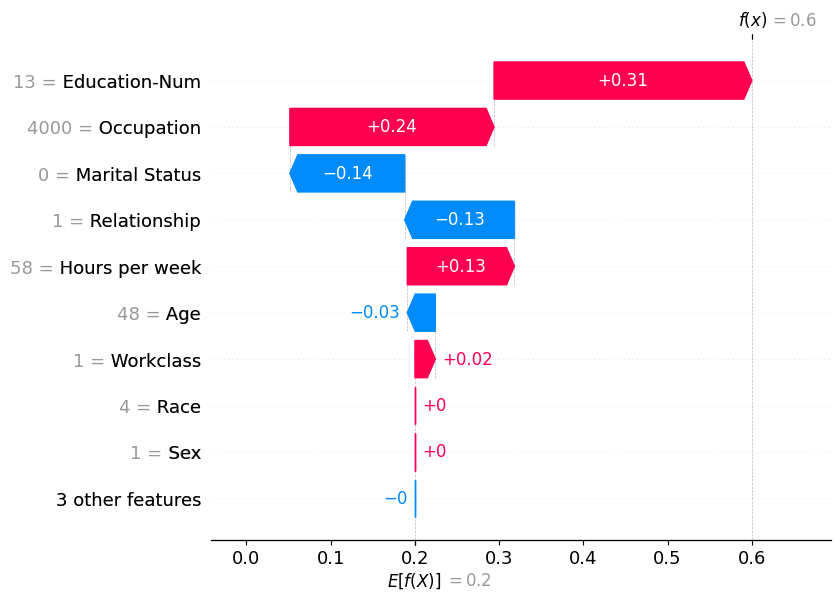

In [84]:
shap.plots.waterfall(shap_values[1])


A summary beeswarm plot is an even better way to see the relative impact of all features over the entire dataset. Features are sorted by the sum of their SHAP value magnitudes across all samples.

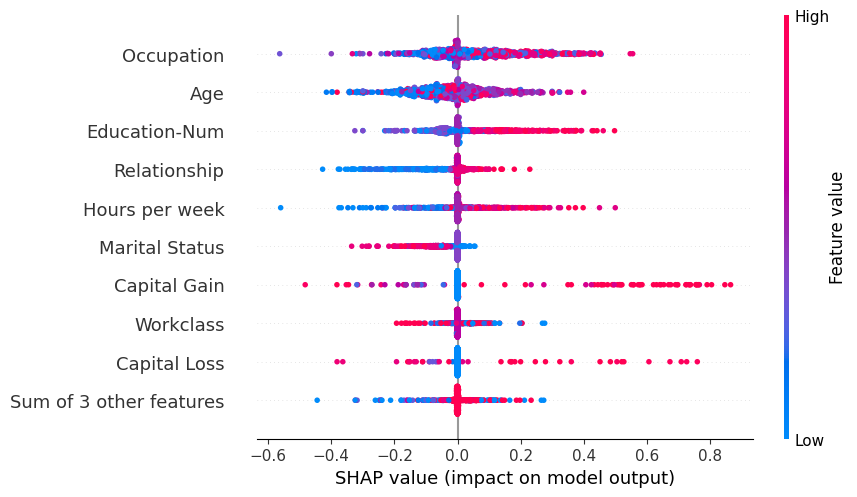

In [85]:
shap.plots.beeswarm(shap_values)


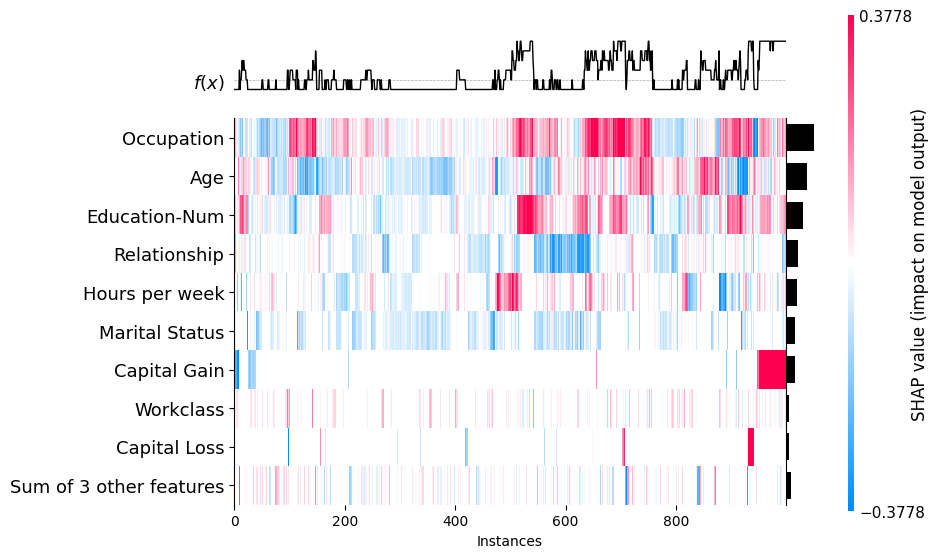

<Axes: xlabel='Instances'>

In [86]:
shap.plots.heatmap(shap_values)


A heatmap plot provides another global view of the model’s behavior, this time with a focus on population subgroups.

Here plotted horizontally are instances and color bars for them depicts what is the general behaviour of the instance sub-group for that particular feature over the output or the prediction of the model for a particular sub-group of instances.

It can be clearly seen that in the instances, there are sub-groups at 800 for occupation feature. The general color coding is red which depicts that they have a positive effect upon the prediction. This can also be seen by the rising curve for the line f(x) towards the top.

### Normalize the data before training the model

Here we retrain a KNN model on standardized data.

In [87]:
# normalize data
dtypes = list(zip(X.dtypes.index, map(str, X.dtypes)))
X_train_norm = X_train.copy()
X_valid_norm = X_valid.copy()
for k, dtype in dtypes:
    m = X_train[k].mean()
    s = X_train[k].std()
    X_train_norm[k] -= m
    X_train_norm[k] /= s

    X_valid_norm[k] -= m
    X_valid_norm[k] /= s


In [88]:
knn_norm = sklearn.neighbors.KNeighborsClassifier()
knn_norm.fit(X_train_norm, y_train)


KNeighborsClassifier()

### Explain predictions

When we explain predictions from the new KNN model we find that Occupation is no longer the dominant feature, but instead more predictive features, such as marital status, drive most predictions. This is simple example of how explaining why your model is making it’s predicitons can uncover problems in the training process.

In [89]:
f = lambda x: knn_norm.predict_proba(x)[:, 1]
med = X_train_norm.median().values.reshape((1, X_train_norm.shape[1]))

explainer = shap.Explainer(f, med)

shap_values_norm = explainer(X_valid_norm.iloc[0:1000, :])


PermutationExplainer explainer: 1001it [01:30,  9.91it/s]                          


With a summary plot with see marital status is the most important on average, but other features (such as captial gain) can have more impact on a particular individual.

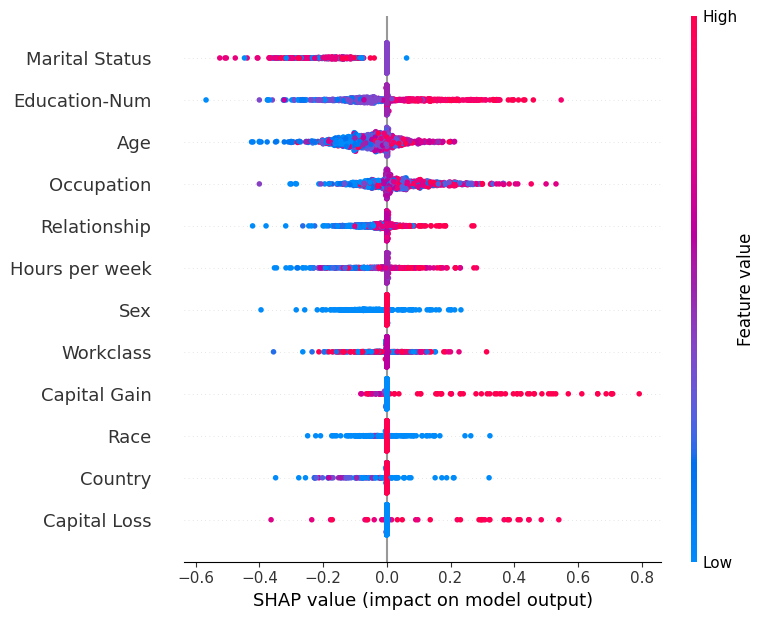

In [90]:
shap.summary_plot(shap_values_norm, X_valid.iloc[0:1000, :])


A dependence scatter plot shows how the number of years of education increases the chance of making over 50K annually.

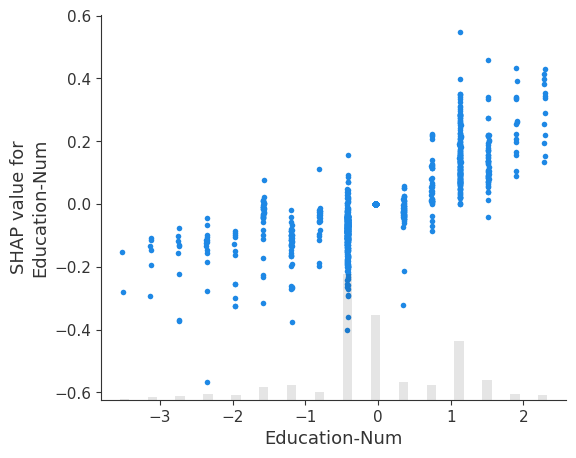

In [91]:
shap.plots.scatter(shap_values_norm[:, "Education-Num"])
